In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.tree import plot_tree,export_graphviz
import graphviz as gp

# Data

In [2]:
master=pd.read_csv('master_dup_removed.csv')
master.head()

,participant_id,age,sex,BMI,handedness,education_category,NEO_N,NEO_E,NEO_O,NEO_A,...,CC_Mid_Anterior,CC_Anterior,CortexVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles
0,sub-0001,26.25,F,24.0,right,applied,35,44,37,39,...,474.1,954.7,431722.3085,412508.1558,52096,579143.3085,1.104817,12,15,27
1,sub-0002,21.00,F,23.0,right,academic,27,53,40,48,...,534.4,1007.6,551229.5244,511140.9554,61775,729961.5244,0.946018,12,3,15
2,sub-0003,23.00,M,22.0,right,academic,35,40,43,37,...,624.5,875.2,484203.7432,488806.8270,55089,666343.7432,1.121519,7,8,15
3,sub-0004,23.50,F,22.0,right,applied,29,47,41,48,...,488.8,952.1,490562.7749,424675.0400,57767,666421.7749,1.046196,14,9,23
4,sub-0005,21.75,M,19.0,ambidextrous,applied,26,35,40,38,...,683.6,941.4,549885.2510,473013.9161,60987,723713.2510,0.981137,17,12,29


In [3]:
master.shape

(1362, 136)

# Clustering

In [4]:
y=master[['NEO_N','NEO_C','NEO_A','NEO_E','NEO_O']]
y

,NEO_N,NEO_C,NEO_A,NEO_E,NEO_O
0,35,48.0,39,44,37
1,27,34.0,48,53,40
2,35,38.0,37,40,43
3,29,41.0,48,47,41
4,26,45.0,38,35,40
...,...,...,...,...,...
1357,40,32.0,38,39,47
1358,28,40.0,34,41,48
1359,27,45.0,41,44,46
1360,35,41.0,45,32,44


In [5]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
y=pd.DataFrame(imputer.fit_transform(y),columns=y.columns)
y

,NEO_N,NEO_C,NEO_A,NEO_E,NEO_O
0,35.0,48.0,39.0,44.0,37.0
1,27.0,34.0,48.0,53.0,40.0
2,35.0,38.0,37.0,40.0,43.0
3,29.0,41.0,48.0,47.0,41.0
4,26.0,45.0,38.0,35.0,40.0
...,...,...,...,...,...
1357,40.0,32.0,38.0,39.0,47.0
1358,28.0,40.0,34.0,41.0,48.0
1359,27.0,45.0,41.0,44.0,46.0
1360,35.0,41.0,45.0,32.0,44.0


In [6]:
scaler = StandardScaler()
scaler.fit(y)
y = pd.DataFrame(scaler.transform(y), columns=y.columns)
y

,NEO_N,NEO_C,NEO_A,NEO_E,NEO_O
0,0.443070,1.246413,-0.428631,0.283842,-0.662282
1,-0.756058,-0.837097,1.126315,1.848997,-0.182480
2,0.443070,-0.241809,-0.774175,-0.411782,0.297323
3,-0.456276,0.204658,1.126315,0.805561,-0.022546
4,-0.905949,0.799947,-0.601403,-1.281313,-0.182480
...,...,...,...,...,...
1357,1.192525,-1.134742,-0.601403,-0.585688,0.937059
1358,-0.606167,0.055836,-1.292490,-0.237876,1.096993
1359,-0.756058,0.799947,-0.083088,0.283842,0.777125
1360,0.443070,0.204658,0.607999,-1.803031,0.457257


In [7]:
clusters = KMeans(n_clusters=5)

In [8]:
clusters.fit(y)

KMeans(n_clusters=5)

In [9]:
clusters.fit_transform(y)

array([[2.13126659, 1.94401696, 2.27121329, 1.60337566, 2.74811891],
       [2.22199786, 3.44345879, 2.91434261, 2.34890487, 3.1790728 ],
       [2.23286473, 1.33494965, 1.0408903 , 2.4453108 , 1.58989927],
       ...,
       [0.72897487, 2.41839493, 2.07190639, 1.77491008, 2.61959086],
       [2.80203333, 1.74600509, 2.98575405, 2.84965228, 1.68397161],
       [1.51765239, 1.86298505, 1.49439029, 1.47695564, 2.06718961]])

In [10]:
centers=pd.DataFrame(scaler.inverse_transform(clusters.cluster_centers_),columns=y.columns)
centers

,NEO_N,NEO_C,NEO_A,NEO_E,NEO_O
0,28.007220,44.093863,44.133574,46.552347,46.108303
1,33.219178,38.554795,39.866438,36.496575,36.479452
2,33.521429,35.496429,34.785714,44.953571,43.525000
3,27.293907,44.541219,44.537634,44.465950,35.605735
4,39.252137,34.747863,44.722222,39.145299,44.824786


In [11]:
clusters.labels_

array([3, 0, 2, ..., 0, 4, 3], dtype=int32)

In [12]:
target_label=clusters.labels_

In [13]:
master['target']=target_label
master

,participant_id,age,sex,BMI,handedness,education_category,NEO_N,NEO_E,NEO_O,NEO_A,...,CC_Anterior,CortexVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles,target
0,sub-0001,26.25,F,24.0,right,applied,35,44,37,39,...,954.7,431722.3085,412508.1558,52096,579143.3085,1.104817,12,15,27,3
1,sub-0002,21.00,F,23.0,right,academic,27,53,40,48,...,1007.6,551229.5244,511140.9554,61775,729961.5244,0.946018,12,3,15,0
2,sub-0003,23.00,M,22.0,right,academic,35,40,43,37,...,875.2,484203.7432,488806.8270,55089,666343.7432,1.121519,7,8,15,2
3,sub-0004,23.50,F,22.0,right,applied,29,47,41,48,...,952.1,490562.7749,424675.0400,57767,666421.7749,1.046196,14,9,23,0
4,sub-0005,21.75,M,19.0,ambidextrous,applied,26,35,40,38,...,941.4,549885.2510,473013.9161,60987,723713.2510,0.981137,17,12,29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,sub-1358,22.25,male,21.0,right,medium,40,39,47,38,...,887.2,517851.7456,517310.5024,66447,711842.7456,0.921517,19,23,42,4
1358,sub-1359,25.25,male,30.0,right,medium,28,41,48,34,...,853.7,519398.3571,565436.6994,65260,718521.3571,0.933091,20,34,54,2
1359,sub-1360,20.75,male,22.0,right,high,27,44,46,41,...,1128.7,567440.1256,469283.5790,61988,756582.1256,0.881901,20,33,53,0
1360,sub-1361,24.25,female,35.0,right,medium,35,32,44,45,...,1005.8,441752.2678,442438.1987,55159,595460.2678,1.003723,31,34,65,4


In [14]:
master.target.value_counts()

1    292
2    280
3    279
0    277
4    234
Name: target, dtype: int64

In [15]:
gaussian_clusters=gm = GaussianMixture(n_components=5, random_state=0)

In [16]:
gaussian_clusters.fit(y)

GaussianMixture(n_components=5, random_state=0)

In [17]:
gaussian_clusters.means_

array([[ 0.36939452,  0.03377824,  0.70017181, -0.1186042 ,  0.47495203],
       [-0.0879497 , -0.42000532, -0.61562154,  0.46988289,  0.27763802],
       [-0.10964357,  0.12263497, -0.14701913, -0.57167953, -0.61590809],
       [-0.798865  ,  0.83230298,  0.53962362,  0.71891071, -0.06264678],
       [ 1.02353298, -0.71047431, -0.27873605, -0.74534831,  0.09162942]])

In [18]:
gaussian_centers=pd.DataFrame(scaler.inverse_transform(gaussian_clusters.means_),columns=y.columns)
gaussian_centers

,NEO_N,NEO_C,NEO_A,NEO_E,NEO_O
0,34.508473,39.851787,45.533492,41.685840,44.110641
1,31.457295,36.802621,37.917704,45.069776,42.876921
2,31.312564,40.448853,40.629966,39.080553,37.289959
3,26.714415,45.217417,44.604242,46.501743,40.749266
4,38.872565,34.850835,39.867591,38.081918,41.713889


In [19]:
gaussian_target=gaussian_clusters.predict(y)

In [20]:
master['gaussian_target']=gaussian_target
master

,participant_id,age,sex,BMI,handedness,education_category,NEO_N,NEO_E,NEO_O,NEO_A,...,CortexVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles,target,gaussian_target
0,sub-0001,26.25,F,24.0,right,applied,35,44,37,39,...,431722.3085,412508.1558,52096,579143.3085,1.104817,12,15,27,3,3
1,sub-0002,21.00,F,23.0,right,academic,27,53,40,48,...,551229.5244,511140.9554,61775,729961.5244,0.946018,12,3,15,0,1
2,sub-0003,23.00,M,22.0,right,academic,35,40,43,37,...,484203.7432,488806.8270,55089,666343.7432,1.121519,7,8,15,2,1
3,sub-0004,23.50,F,22.0,right,applied,29,47,41,48,...,490562.7749,424675.0400,57767,666421.7749,1.046196,14,9,23,0,3
4,sub-0005,21.75,M,19.0,ambidextrous,applied,26,35,40,38,...,549885.2510,473013.9161,60987,723713.2510,0.981137,17,12,29,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,sub-1358,22.25,male,21.0,right,medium,40,39,47,38,...,517851.7456,517310.5024,66447,711842.7456,0.921517,19,23,42,4,4
1358,sub-1359,25.25,male,30.0,right,medium,28,41,48,34,...,519398.3571,565436.6994,65260,718521.3571,0.933091,20,34,54,2,1
1359,sub-1360,20.75,male,22.0,right,high,27,44,46,41,...,567440.1256,469283.5790,61988,756582.1256,0.881901,20,33,53,0,3
1360,sub-1361,24.25,female,35.0,right,medium,35,32,44,45,...,441752.2678,442438.1987,55159,595460.2678,1.003723,31,34,65,4,2


# Random Forest

## Data - X  and y

In [21]:
df = master.copy()

In [22]:
df.dropna(inplace=True)

In [23]:
X = df.drop(columns=["participant_id","NEO_N","NEO_E","NEO_O","NEO_A","NEO_O","NEO_C","target","gaussian_target"])

In [24]:
y = df["gaussian_target"]

## Data pre-processing

In [25]:
X['sex'].replace('F','female',inplace=True)

In [26]:
X['sex'].replace('M','male',inplace=True)

In [27]:
X

,age,sex,BMI,handedness,education_category,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,...,CC_Mid_Anterior,CC_Anterior,CortexVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles
0,26.25,female,24.0,right,applied,2.439,2.985,2.422,1.860,3.808,...,474.1,954.7,431722.3085,412508.1558,52096,579143.3085,1.104817,12,15,27
1,21.00,female,23.0,right,academic,2.820,2.684,2.642,2.008,3.573,...,534.4,1007.6,551229.5244,511140.9554,61775,729961.5244,0.946018,12,3,15
2,23.00,male,22.0,right,academic,2.365,2.832,2.538,1.864,3.479,...,624.5,875.2,484203.7432,488806.8270,55089,666343.7432,1.121519,7,8,15
3,23.50,female,22.0,right,applied,2.475,2.861,2.488,2.082,2.997,...,488.8,952.1,490562.7749,424675.0400,57767,666421.7749,1.046196,14,9,23
4,21.75,male,19.0,ambidextrous,applied,2.691,2.566,2.742,2.067,3.222,...,683.6,941.4,549885.2510,473013.9161,60987,723713.2510,0.981137,17,12,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,22.25,male,21.0,right,medium,2.799,2.628,2.885,1.807,3.288,...,898.8,887.2,517851.7456,517310.5024,66447,711842.7456,0.921517,19,23,42
1358,25.25,male,30.0,right,medium,2.603,2.538,2.538,1.882,3.729,...,848.9,853.7,519398.3571,565436.6994,65260,718521.3571,0.933091,20,34,54
1359,20.75,male,22.0,right,high,2.794,3.122,2.885,1.832,3.937,...,585.8,1128.7,567440.1256,469283.5790,61988,756582.1256,0.881901,20,33,53
1360,24.25,female,35.0,right,medium,2.442,2.708,2.645,1.744,3.163,...,825.9,1005.8,441752.2678,442438.1987,55159,595460.2678,1.003723,31,34,65


In [28]:
X["sex"].unique()

array(['female', 'male'], dtype=object)

In [29]:
X["handedness"].unique()

array(['right', 'ambidextrous', 'left'], dtype=object)

In [30]:
X["education_category"].unique()

array(['applied', 'academic', 'medium', 'high', 'low'], dtype=object)

In [31]:
X.dropna(inplace=True)

In [32]:
X.shape

(1352, 130)

In [33]:
X["sex"].unique()

array(['female', 'male'], dtype=object)

In [34]:
#Encoding SEX 
X["sex_enc"] = X['sex'].replace('female',0)

In [35]:
X["sex_enc"].replace("male",1,inplace=True)

In [36]:
X

,age,sex,BMI,handedness,education_category,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,...,CC_Anterior,CortexVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles,sex_enc
0,26.25,female,24.0,right,applied,2.439,2.985,2.422,1.860,3.808,...,954.7,431722.3085,412508.1558,52096,579143.3085,1.104817,12,15,27,0
1,21.00,female,23.0,right,academic,2.820,2.684,2.642,2.008,3.573,...,1007.6,551229.5244,511140.9554,61775,729961.5244,0.946018,12,3,15,0
2,23.00,male,22.0,right,academic,2.365,2.832,2.538,1.864,3.479,...,875.2,484203.7432,488806.8270,55089,666343.7432,1.121519,7,8,15,1
3,23.50,female,22.0,right,applied,2.475,2.861,2.488,2.082,2.997,...,952.1,490562.7749,424675.0400,57767,666421.7749,1.046196,14,9,23,0
4,21.75,male,19.0,ambidextrous,applied,2.691,2.566,2.742,2.067,3.222,...,941.4,549885.2510,473013.9161,60987,723713.2510,0.981137,17,12,29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,22.25,male,21.0,right,medium,2.799,2.628,2.885,1.807,3.288,...,887.2,517851.7456,517310.5024,66447,711842.7456,0.921517,19,23,42,1
1358,25.25,male,30.0,right,medium,2.603,2.538,2.538,1.882,3.729,...,853.7,519398.3571,565436.6994,65260,718521.3571,0.933091,20,34,54,1
1359,20.75,male,22.0,right,high,2.794,3.122,2.885,1.832,3.937,...,1128.7,567440.1256,469283.5790,61988,756582.1256,0.881901,20,33,53,1
1360,24.25,female,35.0,right,medium,2.442,2.708,2.645,1.744,3.163,...,1005.8,441752.2678,442438.1987,55159,595460.2678,1.003723,31,34,65,0


In [37]:
#Encoding Handedness
enc = OneHotEncoder(sparse = False)
enc.fit(X[["handedness"]])
hand_enc = enc.transform(X[["handedness"]])
X["right"],X["left"],X["ambidextrous"] = hand_enc.T

In [38]:
#Encoding Education
enc = OneHotEncoder(sparse = False)
enc.fit(X[["education_category"]])
ed_enc = enc.transform(X[["education_category"]])
X["applied"],X["academic"],X["medium"],X["high"],X["low"] = ed_enc.T

In [39]:
X

,age,sex,BMI,handedness,education_category,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,...,SurfaceHoles,sex_enc,right,left,ambidextrous,applied,academic,medium,high,low
0,26.25,female,24.0,right,applied,2.439,2.985,2.422,1.860,3.808,...,27,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,21.00,female,23.0,right,academic,2.820,2.684,2.642,2.008,3.573,...,15,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,23.00,male,22.0,right,academic,2.365,2.832,2.538,1.864,3.479,...,15,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,23.50,female,22.0,right,applied,2.475,2.861,2.488,2.082,2.997,...,23,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,21.75,male,19.0,ambidextrous,applied,2.691,2.566,2.742,2.067,3.222,...,29,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,22.25,male,21.0,right,medium,2.799,2.628,2.885,1.807,3.288,...,42,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1358,25.25,male,30.0,right,medium,2.603,2.538,2.538,1.882,3.729,...,54,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1359,20.75,male,22.0,right,high,2.794,3.122,2.885,1.832,3.937,...,53,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1360,24.25,female,35.0,right,medium,2.442,2.708,2.645,1.744,3.163,...,65,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [40]:
X.drop(columns=["sex","handedness","education_category"], inplace = True)

## Model - Random Forest - Gaussian target

### Model data

In [41]:
X

,age,BMI,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,lh_fusiform_thickness,lh_inferiorparietal_thickness,lh_inferiortemporal_thickness,...,SurfaceHoles,sex_enc,right,left,ambidextrous,applied,academic,medium,high,low
0,26.25,24.0,2.439,2.985,2.422,1.860,3.808,2.592,2.348,2.531,...,27,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,21.00,23.0,2.820,2.684,2.642,2.008,3.573,2.838,2.564,2.706,...,15,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,23.00,22.0,2.365,2.832,2.538,1.864,3.479,2.658,2.399,2.804,...,15,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,23.50,22.0,2.475,2.861,2.488,2.082,2.997,2.755,2.538,2.647,...,23,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,21.75,19.0,2.691,2.566,2.742,2.067,3.222,2.795,2.774,2.616,...,29,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,22.25,21.0,2.799,2.628,2.885,1.807,3.288,2.887,2.646,2.941,...,42,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1358,25.25,30.0,2.603,2.538,2.538,1.882,3.729,2.760,2.388,2.724,...,54,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1359,20.75,22.0,2.794,3.122,2.885,1.832,3.937,2.814,2.707,2.864,...,53,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1360,24.25,35.0,2.442,2.708,2.645,1.744,3.163,2.573,2.480,2.875,...,65,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [42]:
y

0       3
1       1
2       1
3       3
4       2
       ..
1357    4
1358    1
1359    3
1360    2
1361    1
Name: gaussian_target, Length: 1352, dtype: int64

### Baseline model

In [43]:
master.target.value_counts()/len(X)

1    0.215976
2    0.207101
3    0.206361
0    0.204882
4    0.173077
Name: target, dtype: float64

In [44]:
forest = RandomForestClassifier(n_estimators=100,n_jobs=-1)
cv_results = cross_validate(forest, X, y, scoring = "accuracy", cv=3)
print(cv_results['test_score'])

[0.35254989 0.35476718 0.30888889]


In [45]:
#model 2
forest = RandomForestClassifier(n_estimators=200,max_depth =5,n_jobs=-1)
cv_results = cross_validate(forest, X, y, scoring = "accuracy", cv=3)
print(cv_results['test_score'])

[0.33259424 0.39467849 0.30222222]


In [46]:
#model 3
forest = RandomForestClassifier(n_estimators=200,n_jobs=-1, max_depth = 5, max_features = 50)
cv_results = cross_validate(forest, X, y, scoring = "accuracy", cv=3)
print(cv_results['test_score'])

[0.33924612 0.36363636 0.30222222]


In [47]:
forest.fit(X,y)

RandomForestClassifier(max_depth=5, max_features=50, n_estimators=200,
                       n_jobs=-1)

In [48]:
df_features_import = pd.DataFrame(forest.feature_importances_)

In [49]:
df_features_import.index=X.columns

In [50]:
df_features_import.sort_values(0,ascending=False)

,0
Left-Accumbens-area,0.065764
Optic-Chiasm,0.047239
SurfaceHoles,0.038549
MaskVol-to-eTIV,0.014822
rh_entorhinal_thickness,0.014473
...,...
Left-non-WM-hypointensities,0.000000
Right-WM-hypointensities,0.000000
non-WM-hypointensities,0.000000
high,0.000000


In [51]:
len(forest.estimators_)

200

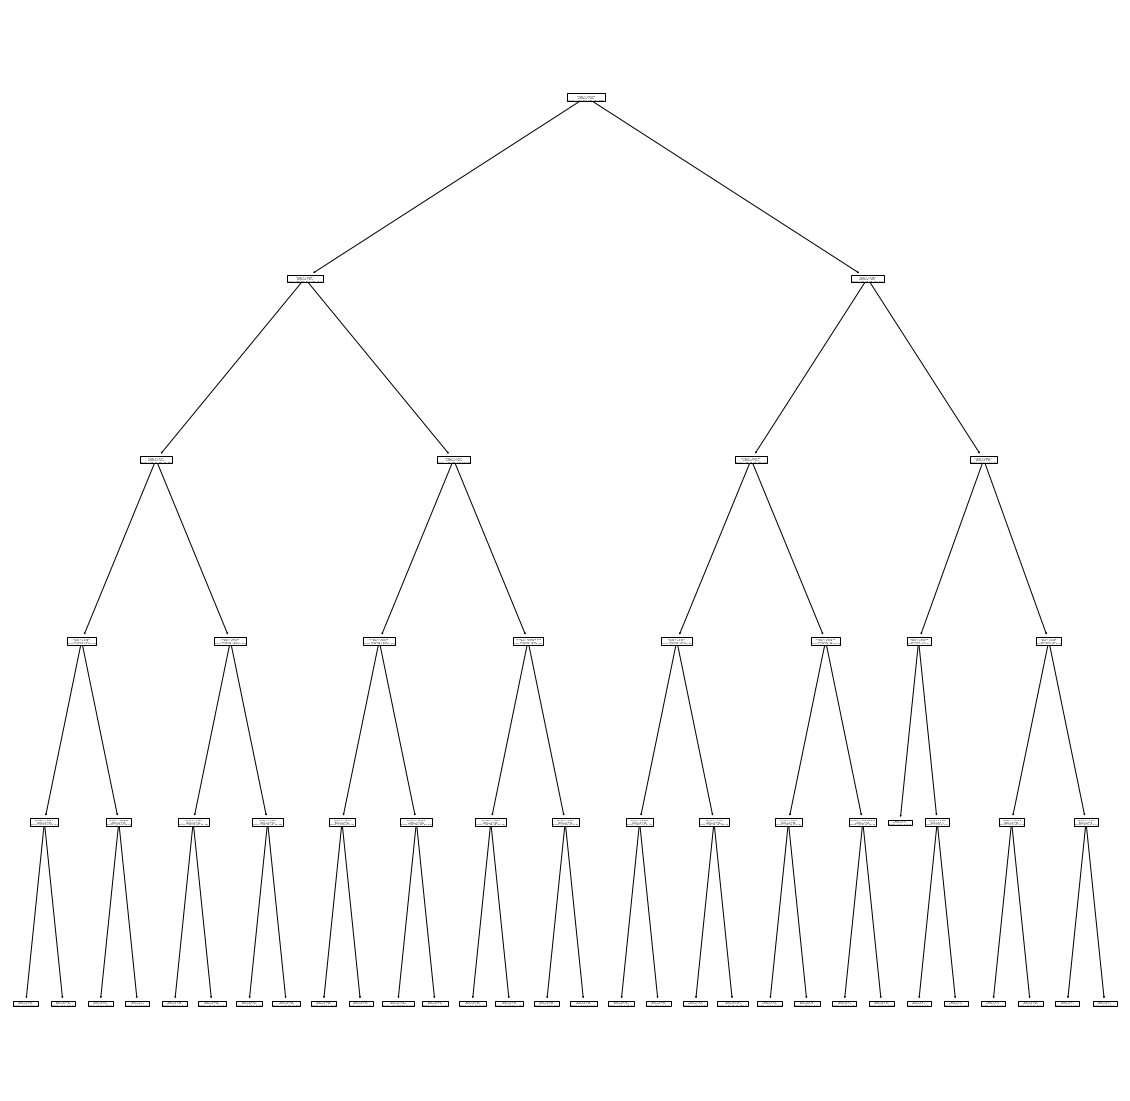

In [52]:
fig,ax = plt.subplots(1,1,figsize=(20,20))
plot_tree(forest.estimators_[20],ax=ax);

In [53]:
#!pip install graphviz

In [54]:
#tree_file = export_graphviz(forest.estimators_[20],out_file="tree.dot")

In [55]:
#gp.Source(tree_file,filename ="tree.dot",format="png")

### Grid Search - optimizing the model

In [56]:
#Parameters to tune

#number of trees in the foreset
#n_estimators = [100,150,200]
# Maximum number of levels in tree
max_depth = [5,10,15,20,25,30]
#Maximum number of features per tree
max_features = [15,20,25,30,50,100]

#Create the random grid

grid={
    #"n_estimators": n_estimators,
    "max_depth": max_depth,
    "max_features": max_features
}

print(grid)

{'max_depth': [5, 10, 15, 20, 25, 30], 'max_features': [15, 20, 25, 30, 50, 100]}


In [57]:
model = RandomForestClassifier()

grid_search = GridSearchCV(estimator = model,param_grid= grid,cv= 3,n_jobs=-1)

In [58]:
#fit the grid data
grid_search.fit(X, y)

#calculate the best parameters
grid_search.best_params_

{'max_depth': 25, 'max_features': 30}

In [77]:
forest = RandomForestClassifier(n_jobs=-1, max_depth = 25, max_features = 30)
cv_results = cross_validate(forest, X, y, scoring = "accuracy", cv=3)
print(cv_results['test_score'])

[0.31929047 0.28824834 0.21777778]


## Model - Random Forest - Kmeans target

### Data & preprocessing

In [60]:
df = master.copy()

In [61]:
df.dropna(inplace=True)

In [62]:
X = df.drop(columns=["participant_id","NEO_N","NEO_E","NEO_O","NEO_A","NEO_O","NEO_C","target","gaussian_target"])

In [63]:
y = df["target"]

In [64]:
X['sex'].replace('F','female',inplace=True)

In [65]:
X['sex'].replace('M','male',inplace=True)

In [66]:
X["sex_enc"] = X['sex'].replace('female',0)

In [67]:
X["sex_enc"].replace("male",1,inplace=True)

In [68]:
#Encoding Handedness
enc = OneHotEncoder(sparse = False)
enc.fit(X[["handedness"]])
hand_enc = enc.transform(X[["handedness"]])
X["right"],X["left"],X["ambidextrous"] = hand_enc.T

In [69]:
#Encoding Education
enc = OneHotEncoder(sparse = False)
enc.fit(X[["education_category"]])
ed_enc = enc.transform(X[["education_category"]])
X["applied"],X["academic"],X["medium"],X["high"],X["low"] = ed_enc.T

In [70]:
X.drop(columns=["sex","handedness","education_category"], inplace = True)

### Baseline model

In [78]:
master.target.value_counts()/len(X)

1    0.215976
2    0.207101
3    0.206361
0    0.204882
4    0.173077
Name: target, dtype: float64

### Grid Search - optimizing the model

In [72]:
#Parameters to tune

# Maximum number of levels in tree
max_depth = [5,10,15,20,25,30]
#Maximum number of features per tree
max_features = [15,20,25,30,50,100]

#Create the random grid

grid={
    #"n_estimators": n_estimators,
    "max_depth": max_depth,
    "max_features": max_features
}

print(grid)

{'max_depth': [5, 10, 15, 20, 25, 30], 'max_features': [15, 20, 25, 30, 50, 100]}


In [73]:
model = RandomForestClassifier()

grid_search = GridSearchCV(estimator = model,param_grid= grid,cv= 3,n_jobs=-1)

In [74]:
#fit the grid data
grid_search.fit(X, y)

#calculate the best parameters
grid_search.best_params_

{'max_depth': 5, 'max_features': 25}

In [76]:
forest = RandomForestClassifier(n_jobs=-1, max_depth = 5, max_features = 25)
cv_results = cross_validate(forest, X, y, scoring = "accuracy", cv=3)
print(cv_results['test_score'])

[0.32815965 0.30155211 0.22222222]
